### Label dataset origin

In [7]:
from datasets import load_dataset

# Replace with your dataset's name on Hugging Face
dataset_name = "HSLU-AICOMP-LearningAgencyLab/labeled-train-dataset"

# Step 1: Download the dataset
print(f"Downloading the dataset: {dataset_name}")
downloaded_dataset = load_dataset(dataset_name)

# Step 2: Convert the 'train' split to a pandas DataFrame
train_df = downloaded_dataset['train'].to_pandas()

# Step 3: Filter for rows where In_Persuade_Corpus is False
not_persuade_df = train_df[train_df['In_Persuade_Corpus'] == False]

# Step 4: Extract all essay_ids
not_persuade_ids = not_persuade_df['essay_id'].tolist()

# Step 5: Print the filtered essay_ids and their count
print(f"Found {len(not_persuade_ids)} essays that are not in the Persuade Corpus.")
print("Last 5 filtered essay_ids (Kaggle only dataset entries):")
print(not_persuade_ids[-5:])  # Slicing to get the last 5 IDs





Found 3485 essays that are not in the Persuade Corpus.
Last 5 filtered essay_ids (Kaggle only dataset entries):
['475637e', '594ab7d', '0759934', '0804daa', '4794787']


### Subset distribution

C:\Users\janni\AppData\Local\Temp\ipykernel_14600\2818555107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["Persuade Texts", "Kaggle Only"],


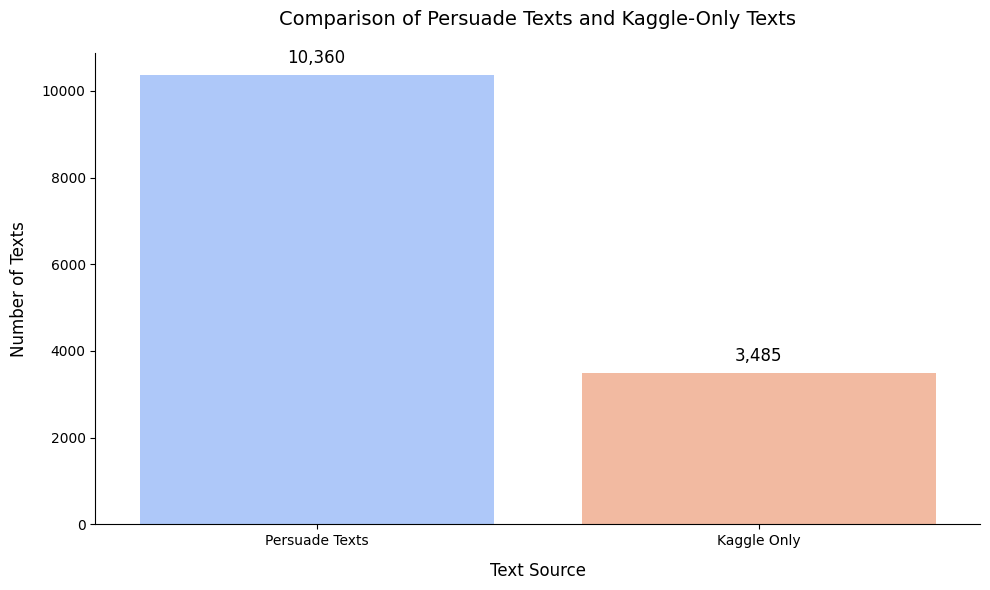

In [11]:
# Improved Visualization without Bold Text
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=["Persuade Texts", "Kaggle Only"], 
                 y=[persuade_count, non_persuade_count], 
                 palette="coolwarm", saturation=0.9)

# Add text annotations for counts
for idx, value in enumerate([persuade_count, non_persuade_count]):
    ax.text(idx, value + 200, f"{value:,}", ha='center', va='bottom', fontsize=12, color='black')

# Style the plot
plt.title("Comparison of Persuade Texts and Kaggle-Only Texts", fontsize=14, pad=20)
plt.xlabel("Text Source", fontsize=12, labelpad=10)
plt.ylabel("Number of Texts", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

# Show grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


### Score distribution for each Subset

C:\Users\janni\AppData\Local\Temp\ipykernel_14600\3118389566.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=persuade_counts.index, y=persuade_counts.values, palette="viridis")


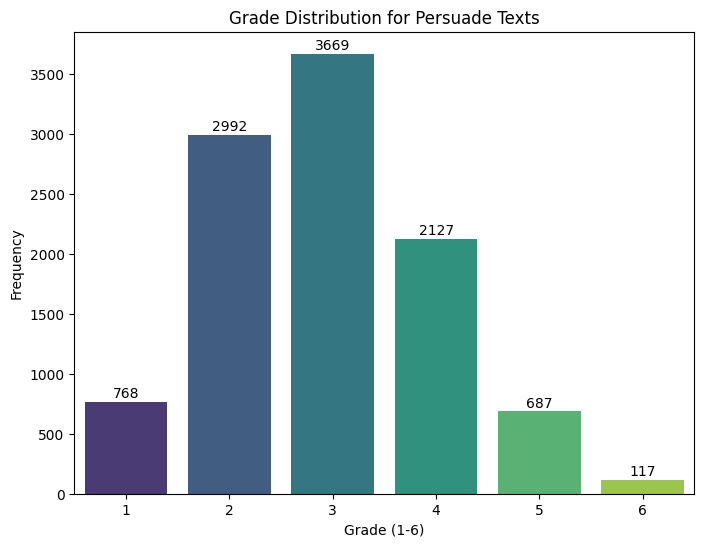

C:\Users\janni\AppData\Local\Temp\ipykernel_14600\3118389566.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=non_persuade_counts.index, y=non_persuade_counts.values, palette="plasma")


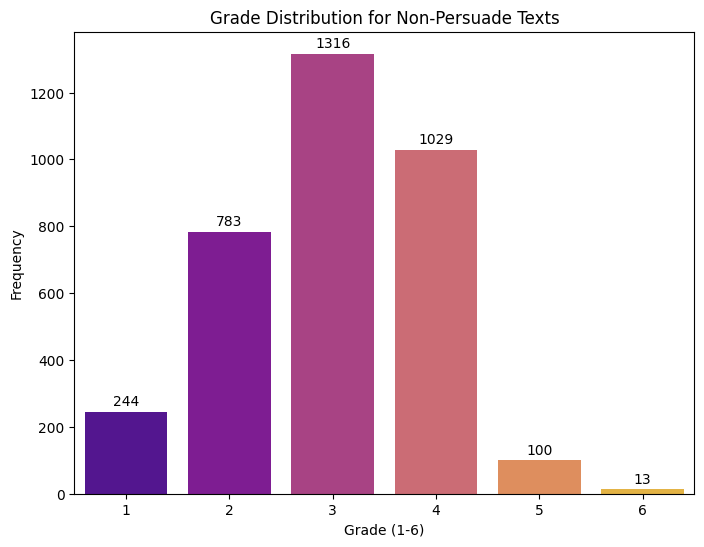

In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_name = "HSLU-AICOMP-LearningAgencyLab/featuers_labels_combined"
dataset = load_dataset(dataset_name)["train"]

# Convert to pandas
primary_df = dataset.to_pandas()

# Group data by 'score' and 'In_Persuade_Corpus'
persuade_data = primary_df[primary_df["In_Persuade_Corpus"] == True]
non_persuade_data = primary_df[primary_df["In_Persuade_Corpus"] == False]

# Count distribution of grades (scores) for each group
persuade_counts = persuade_data["score"].value_counts().sort_index()
non_persuade_counts = non_persuade_data["score"].value_counts().sort_index()

# Plot grade distributions for Persuade texts with exact counts
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=persuade_counts.index, y=persuade_counts.values, palette="viridis")
for idx, value in enumerate(persuade_counts.values):
    ax.text(idx, value + 10, str(value), ha='center', va='bottom', fontsize=10)
plt.title("Grade Distribution for Persuade Texts")
plt.xlabel("Grade (1-6)")
plt.ylabel("Frequency")
plt.xticks(range(len(persuade_counts)), labels=persuade_counts.index)
plt.show()

# Plot grade distributions for Non-Persuade texts with exact counts
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=non_persuade_counts.index, y=non_persuade_counts.values, palette="plasma")
for idx, value in enumerate(non_persuade_counts.values):
    ax.text(idx, value + 10, str(value), ha='center', va='bottom', fontsize=10)
plt.title("Grade Distribution for Non-Persuade Texts")
plt.xlabel("Grade (1-6)")
plt.ylabel("Frequency")
plt.xticks(range(len(non_persuade_counts)), labels=non_persuade_counts.index)
plt.show()
